In [1]:
import pandas as pd

In [119]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/03/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

In [120]:
df_schoolzone.info() #데이터프레임 기본 정보 - 행수, 컬럼 정보 등. object(string), int, float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17472 non-null  object 
 1   name        17472 non-null  object 
 2   addr_road   17421 non-null  object 
 3   addr_jibun  13815 non-null  object 
 4   lat         17468 non-null  float64
 5   lon         17468 non-null  float64
 6   admin_nm    17472 non-null  object 
 7   cctv_yn     17472 non-null  object 
 8   cctv_cnt    12766 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [121]:
df_schoolzone.head() #맨 위의 5행 정보를 보여줌. 괄호안에 건수 지정 가능. 맨 아래 5건은 .tail()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,NaN
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [122]:
# 수치형 데이터 항목에 대해 건수, 산술평균, 표준편차, 최소, 최대, 4분위값 요약 통계 제공
df_schoolzone.describe()

,lat,lon
count,17468.000000,17468.000000
mean,36.347662,127.628690
std,1.018121,0.868320
min,33.169167,124.661632
25%,35.553054,126.945156
50%,36.326048,127.324280
75%,37.357365,128.507033
max,38.542101,130.902800


Null 등으로 인해 문자열(object) 형식으로 인식된 CCTV 갯수(cctv_cnt) 항목에 대한 요약 통계가 궁금할 때

In [123]:
# 데이터의 Null 값을 체크
df_schoolzone.isnull().sum()

type             0
name             0
addr_road       51
addr_jibun    3657
lat              4
lon              4
admin_nm         0
cctv_yn          0
cctv_cnt      4706
dtype: int64

- 도로명주소와 지번주소 중에 어떤 것을 활용하는 것이 좋을까요? 특히, 대용량의 데이터여서 지오코딩 결과 건수를 검토할 수 없다면...  
- 좌표가 없는 데이터...  
- CCTV 건수 정보가 없는 데이터     
 : 결측치 비율은?   
 : CCTV 여부(cctv_yn)은 Y인데, 건수가 없는 것은?  

In [124]:
#좌표값 없는 데이터 제거
df_schoolzone2 = df_schoolzone[ (df_schoolzone['lat'] > 0) & (df_schoolzone['lon'] > 0) ]
df_schoolzone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17467 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17467 non-null  object 
 1   name        17467 non-null  object 
 2   addr_road   17416 non-null  object 
 3   addr_jibun  13810 non-null  object 
 4   lat         17467 non-null  float64
 5   lon         17467 non-null  float64
 6   admin_nm    17467 non-null  object 
 7   cctv_yn     17467 non-null  object 
 8   cctv_cnt    12763 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.3+ MB


In [125]:
# CCTV 여부(cctv_yn)은 Y인데, 건수가 없는 데이터 조회
df_schoolzone3 = df_schoolzone2[ (df_schoolzone2['cctv_yn'].str.contains('Y')==True) & (df_schoolzone2['cctv_cnt'].isnull() ) ]
df_schoolzone3.info()
df_schoolzone3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 3 to 17373
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        3050 non-null   object 
 1   name        3050 non-null   object 
 2   addr_road   3050 non-null   object 
 3   addr_jibun  2364 non-null   object 
 4   lat         3050 non-null   float64
 5   lon         3050 non-null   float64
 6   admin_nm    3050 non-null   object 
 7   cctv_yn     3050 non-null   object 
 8   cctv_cnt    0 non-null      object 
dtypes: float64(2), object(7)
memory usage: 238.3+ KB


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,NaN
5,유치원,운동초교 병설유치원,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,NaN
15,유치원,산남초교 병설유치원,충청북도 청주시 서원구 산남로 112 (산남동),충청북도 청주시 서원구 산남동675,36.611097,127.461383,청주시,Y,NaN
18,유치원,샛별초교 병설유치원,충청북도 청주시 서원구 원흥로 24 (산남동),충청북도 청주시 서원구 산남동1095,36.608876,127.471671,청주시,Y,NaN
24,유치원,성화초교 병설유치원,충청북도 청주시 서원구 신화로 22 (성화동),충청북도 청주시 서원구 성화동629,36.616015,127.455559,청주시,Y,NaN


In [126]:
df_schoolzone2.fillna(0, inplace=True)   #null을 0으로 일괄 대체
df_schoolzone2['cctv_cnt'] = df_schoolzone2['cctv_cnt'].astype(int)  #cctv_cnt 항목을 정수형 타입으로 변환 

C:\Users\dhl\anaconda3\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\dhl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
df_schoolzone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17467 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17467 non-null  object 
 1   name        17467 non-null  object 
 2   addr_road   17467 non-null  object 
 3   addr_jibun  17467 non-null  object 
 4   lat         17467 non-null  float64
 5   lon         17467 non-null  float64
 6   admin_nm    17467 non-null  object 
 7   cctv_yn     17467 non-null  object 
 8   cctv_cnt    17467 non-null  int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 1.3+ MB


In [129]:
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [130]:
#CCTV 여부(cctv_yn)은 Y이고, 건수가 0인 데이터의 CCTV_CNT를 1로 일괄 적용. 
#np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)
import numpy as np
df_schoolzone2['cctv_cnt'] = np.where(((df_schoolzone2['cctv_yn'].str.contains('Y')==True) & (df_schoolzone2['cctv_cnt']== 0)), 1, df_schoolzone2['cctv_cnt'])

C:\Users\dhl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [132]:
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,1
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [133]:
df_schoolzone2.describe()

,lat,lon,cctv_cnt
count,17467.000000,17467.000000,17467.000000
mean,36.347590,127.628665,2.069617
std,1.018106,0.868339,2.511753
min,33.169167,124.661632,0.000000
25%,35.553054,126.945156,1.000000
50%,36.326031,127.324280,1.000000
75%,37.357263,128.507118,3.000000
max,38.542101,130.902800,46.000000


In [134]:
df_schoolzone3 = df_schoolzone2[df_schoolzone2['cctv_cnt'] > 40]
df_schoolzone3.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
13778,유치원,유정유치원,서울특별시 강남구 광평로34길 17,0,37.483007,127.094942,서울특별시 강남구청,Y,46


In [135]:
# CCTV 여부(cctv_yn)은'N'인데, 건수가 1 이상인 데이터 조회
df_schoolzone4 = df_schoolzone2[ (df_schoolzone2['cctv_yn'].str.contains('N')==True) & (df_schoolzone2['cctv_cnt'] > 0 ) ]
df_schoolzone4.info()
df_schoolzone4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 2046 to 17411
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        28 non-null     object 
 1   name        28 non-null     object 
 2   addr_road   28 non-null     object 
 3   addr_jibun  28 non-null     object 
 4   lat         28 non-null     float64
 5   lon         28 non-null     float64
 6   admin_nm    28 non-null     object 
 7   cctv_yn     28 non-null     object 
 8   cctv_cnt    28 non-null     int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 2.1+ KB


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
2046,어린이집,광주법원어린이집,광주광역시 동구 필문대로187번길 31,0,35.154935,126.936214,광주광역시 동구청,N,2
2048,어린이집,동명어린이집,광주광역시 동구 주남길 20-10,0,35.101502,126.941945,광주광역시 동구청,N,3
2847,유치원,양지,부산광역시 연제구 쌍미천로30번길 53,부산광역시 연제구 연산동 산143-7,35.177807,129.092640,부산광역시 연제구청,N,1
3239,어린이집,인천근로복지공단어린이집,인천광역시 서구 승학로197번길 20-10,인천광역시 서구 심곡동 342-8,37.540946,126.671463,인천서구청,N,1
3496,초등학교,함월초등학교,울산광역시 중구 학성1길 25 (복산동),울산광역시 중구 복산동 504,35.559012,129.329191,울산광역시 중구,N,1


CCTV 건수 분포를 시각화해서 보고 싶은 경우

In [158]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic') #한글 폰트 적용시

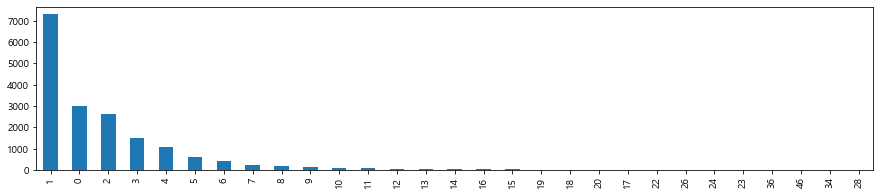

In [195]:
df_schoolzone2['cctv_cnt'].value_counts().plot(kind='bar', figsize=(15,3)) 
plt.show()

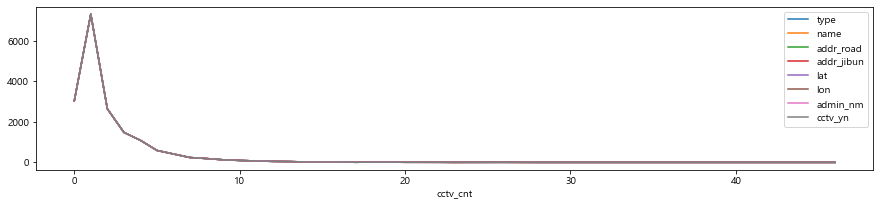

In [160]:
df_schoolzone2.groupby(['cctv_cnt']).count().plot(figsize=(15,3)) 
plt.show()

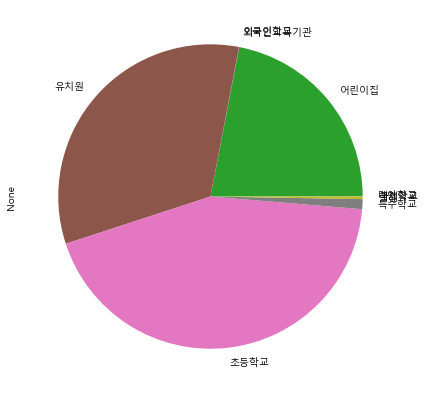

In [181]:
df_schoolzone2.groupby(['type']).size().plot(kind='pie', figsize=(7,7)) 
plt.show()

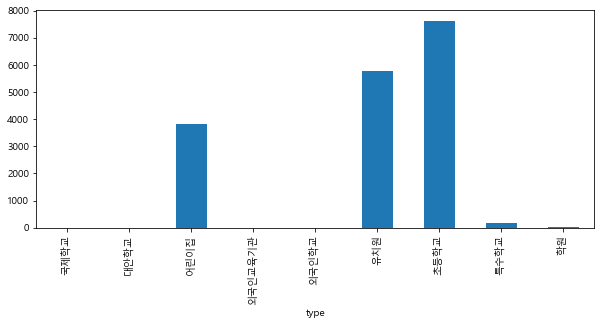

In [179]:
df_schoolzone2.groupby(['type']).size().plot(kind='bar', figsize=(10,4), stacked = False) 
plt.show()

Pandas에서 count와 size의 차이   
- count : NaN을 coount하지 않음  
- size : NaN을 coount함


In [237]:
import seaborn as sns

C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


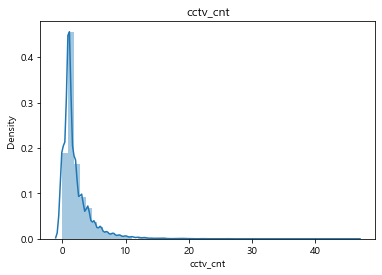

C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


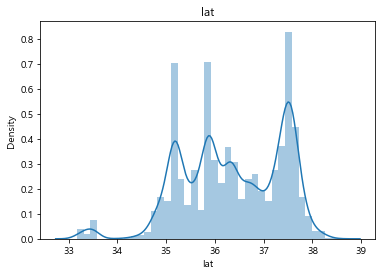

C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


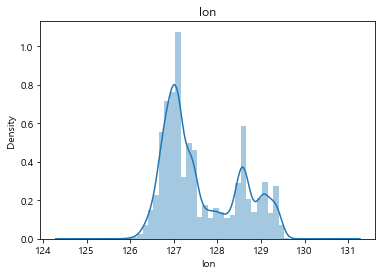

In [241]:
#Seaborn을 이용한 수치형 항목 기초 통계 시각화
for col in ['cctv_cnt', 'lat', 'lon']:
    sns.distplot(df_schoolzone2.loc[df_schoolzone2[col].notnull(), col])
    plt.title(col)
    plt.show()

C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


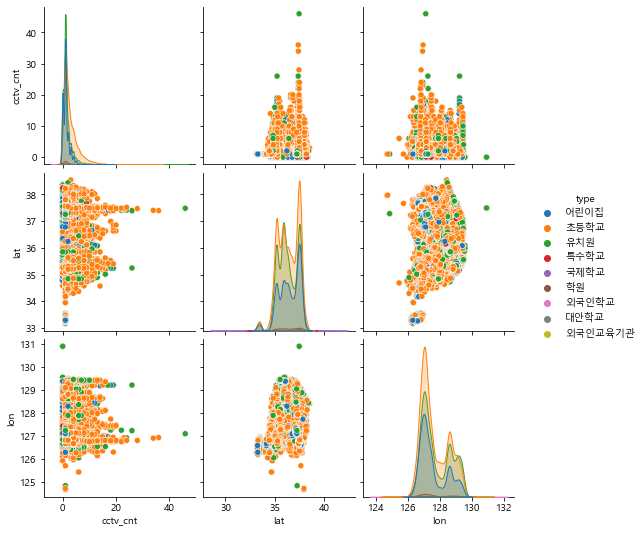

In [245]:
# type 항목에 대해 각 수치형 항목 데이터를 쌍대비교 시각화 
sns.pairplot(df_schoolzone2[['cctv_cnt', 'lat', 'lon'] + ['type']], hue='type', 
             x_vars=['cctv_cnt', 'lat', 'lon'], y_vars=['cctv_cnt', 'lat', 'lon'])
plt.show()

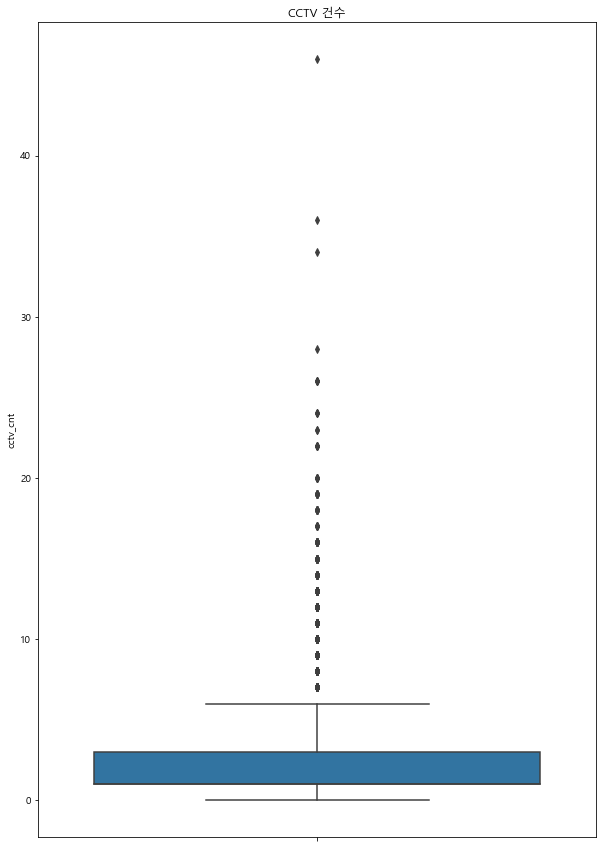

In [252]:
plt.figure(figsize=(10,15))
sns.boxplot(y='cctv_cnt', data=df_schoolzone2)
plt.title("CCTV 건수")
plt.show()

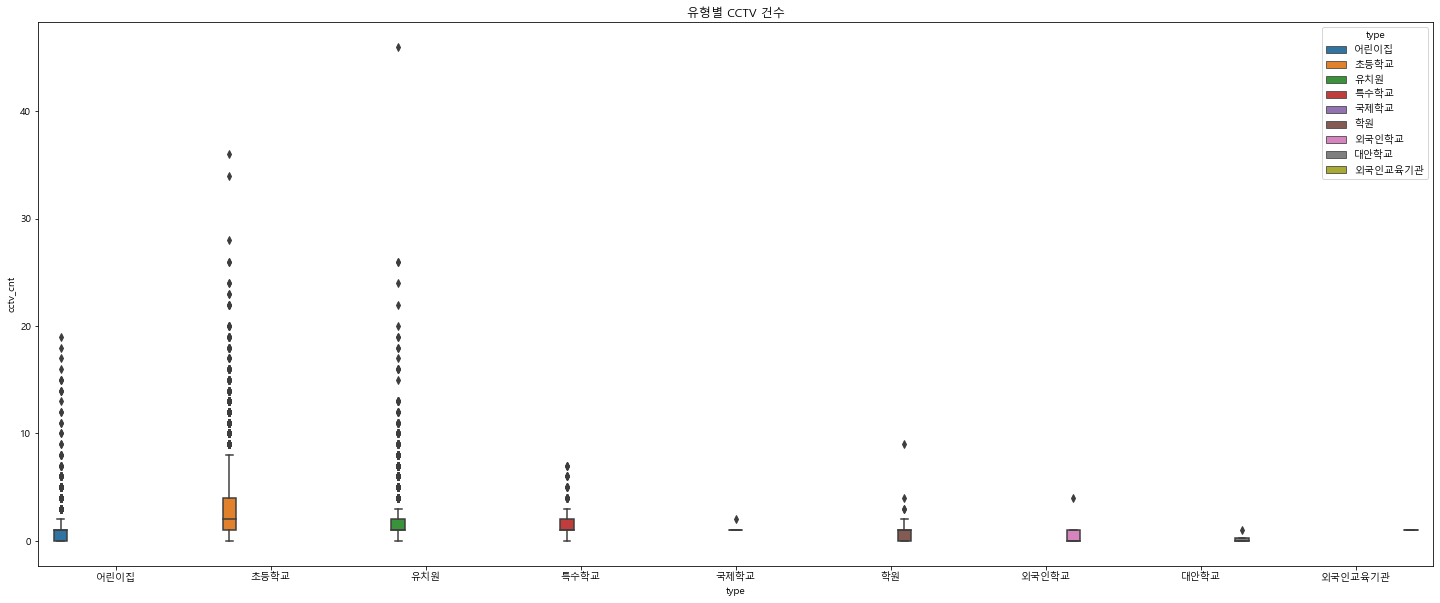

In [249]:
plt.figure(figsize=(25,10))
sns.boxplot(x='type', y='cctv_cnt', hue='type', data=df_schoolzone2)
plt.title("유형별 CCTV 건수")
plt.show()

In [236]:
df_schoolzone5 = df_schoolzone2.groupby('type').size().reset_index()  #유형(type)별 건수 집계 항목 생성
df_schoolzone5.columns =['type','count']
df_schoolzone5['count_rank'] = df_schoolzone5['count'].rank(ascending=False, method='min') #건수 순위 항목 생성
df_schoolzone5.head(10)

,type,count,count_rank
0,국제학교,6,6.0
1,대안학교,4,7.0
2,어린이집,3827,3.0
3,외국인교육기관,1,9.0
4,외국인학교,4,7.0
5,유치원,5769,2.0
6,초등학교,7624,1.0
7,특수학교,185,4.0
8,학원,47,5.0


In [235]:
df_schoolzone6 = df_schoolzone5.sort_values(by = 'count_rank').head(10)  # 건수 순위순으로 행 재정렬
df_schoolzone6.head(10)

,type,count,count_rank
6,초등학교,7624,1.0
5,유치원,5769,2.0
2,어린이집,3827,3.0
7,특수학교,185,4.0
8,학원,47,5.0
0,국제학교,6,6.0
1,대안학교,4,7.0
4,외국인학교,4,7.0
3,외국인교육기관,1,9.0


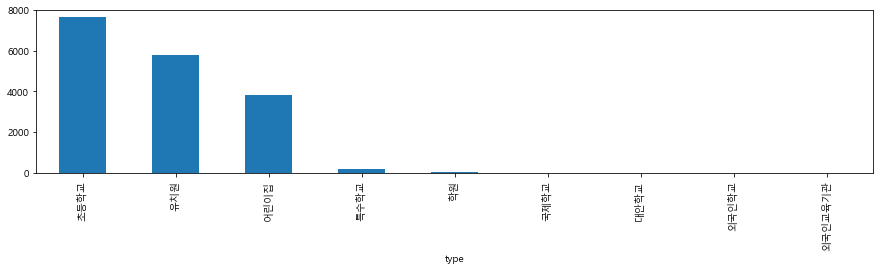

In [257]:
df_schoolzone6.index = ['초등학교', '유치원', '어린이집', '특수학교', '학원', '국제학교', '대안학교', '외국인학교', '외국인교육기관']
df_schoolzone6['count'].plot(kind='bar', figsize=(15,3)) 
plt.xlabel('type')
plt.show()